In [1907]:
#import sys
#!{sys.executable} -m pip install statsmodels

In [1908]:
import function
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, t, f

from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, Normalizer, OneHotEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression, LassoCV, RidgeCV
from sklearn.model_selection import train_test_split
import plotly.graph_objects as go
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import plotly.graph_objs as go
from ipywidgets import *
from importlib import reload


In [1909]:
df = pd.read_csv("soMuchWorkIHadToDrinkOneBeer.csv" )
Y = df["review_overall"]

print(df.shape)
print(df.columns)

function = reload(function)


(3197, 25)
Index(['Name', 'Style', 'Brewery', 'Beer Name (Full)', 'Description', 'ABV',
       'Min IBU', 'Max IBU', 'Astringency', 'Body', 'Alcohol', 'Bitter',
       'Sweet', 'Sour', 'Salty', 'Fruits', 'Hoppy', 'Spices', 'Malty',
       'review_aroma', 'review_appearance', 'review_palate', 'review_taste',
       'review_overall', 'number_of_reviews'],
      dtype='object')


## Objective

the objective with this dataset is to be able to predict the "review_overall" of a beer 

we could also try to determine what factors have the most impact on a score and give feedback to improve a beer based on it's attributes :

Here is an outline of the process:

    -Collect a labeled dataset, where each entry is associated with a score and its attributes.
    -Preprocess the data, including splitting it into training and testing sets.
    -Train a model on the training set, using a supervised learning algorithm such as linear regression, decision tree, or random forest.
    -Test the model on the testing set and evaluate its performance.
    -Use the trained model to predict the score for a new entry with the attributes you want to change.
    -Modify the attributes of the new entry and re-predict the score using the trained model.
    -Compare the scores obtained before and after modifying the attributes to determine which attribute changes lead to an improvement in the score.

It's worth noting that this process assumes that the relationship between the attributes and the score is linear or can be approximated by a linear model. If this is not the case, you may need to use a more complex model or consider other approaches to identify the attribute changes that lead to an improvement in the score.

## Descriptive analysis 

| - informative variables: | - Qualitative variables:   | - Quantitative variable: | - Scores: |
|------|------|------|------|
|   1 Name |1 Style|1 ABV|1 review_aroma
|2 Full Name |2 brewery|2 Min IBU|2 review_appearance
|3 description  | | 3 Max IBU|3 review_palate
| | |4 Astringency|4 review_taste
| | |5 Body|///////////////////////////////////|
| | |6 Alcohol|5 review_overall
| | |7 Bitter|
| | |8 Sweet|
| | |9 Sour|
| | |10 Salty|
| | |11 Fruits|
| | |12 Hoppy|
| | |13 Spices|
| | |14 Malty| 


The informative variables don't give a lot of information about the score that are not already presents in the other variables. Therefore they wont be used 

The qualitative variables will be one-hot encoded to be treated as Quantitative variables 

The Quantitative variables will be used as his 

the scores will be used as target for the model 

| name              |      mean |        std |   skewness |   kurtosis |
|:------------------|----------:|-----------:|-----------:|-----------:|
| Style             |  55.5705  |  32.3737   | -0.0196824 |  -1.18762  |
| Brewery           | 296.225   | 169.184    | -0.178968  |  -1.2789   |
| ABV               |   6.52669 |   2.547    |  3.67993   |  55.2444   |
| Min IBU           |  21.1805  |  13.2422   |  1.09326   |   1.32465  |
| Max IBU           |  38.9869  |  21.3553   |  0.99054   |   0.977638 |
| Astringency       |  16.5158  |  10.4107   |  1.31567   |   2.7722   |
| Body              |  46.1295  |  25.9478   |  1.14028   |   1.61526  |
| Alcohol           |  17.056   |  17.3313   |  2.23306   |   6.28596  |
| Bitter            |  36.3644  |  25.7912   |  1.00606   |   0.938633 |
| Sweet             |  58.2709  |  34.2813   |  0.905323  |   1.31787  |
| Sour              |  33.1454  |  35.7802   |  2.52257   |   7.85566  |
| Salty             |   1.0172  |   2.13265  |  7.53925   | 115.175    |
| Fruits            |  38.5296  |  32.2966   |  0.944666  |   0.220681 |
| Hoppy             |  40.9246  |  30.4036   |  1.10125   |   0.909249 |
| Spices            |  18.3456  |  23.7566   |  2.89396   |  10.4379   |
| Malty             |  75.3309  |  39.9093   |  0.382408  |  -0.195185 |
| review_aroma      |   3.63879 |   0.503209 | -1.09663   |   1.739    |
| review_appearance |   3.75439 |   0.403416 | -1.41173   |   2.90485  |
| review_palate     |   3.66043 |   0.449937 | -1.19533   |   2.19325  |
| review_taste      |   3.7025  |   0.510361 | -1.15676   |   1.9346   |
| review_overall    |   3.74752 |   0.444288 | -1.31737   |   2.72505  |
| number_of_reviews | 233.285   | 361.812    |  3.02845   |  11.8498   |

In [1910]:

def describe_columns(dataset):
    # create an empty dataframe to store the results
    results = pd.DataFrame(columns=["name",'mean', 'std', 'skewness', 'kurtosis'])
    
    # iterate over each column in the dataset
    for col in dataset.columns:

        if (dataset[col].dtypes == float or dataset[col].dtypes == np.int64):
        # calculate the mean, standard deviation, skewness, and kurtosis
            
            mean = dataset[col].mean()
            std = dataset[col].std()
            skewness = skew(dataset[col])
            kurt = kurtosis(dataset[col])
            results.loc[col] = [ col, mean, std, skewness, kurt]

       
        
    return results

In [1911]:
nbr_style = df['Style'].nunique()
print(nbr_style)
nbr_brewery = df['Brewery'].nunique()
print(nbr_brewery)

11
934


In [1912]:
table = describe_columns(df)
print(len(table))
markdown_table = table.to_markdown(index=False)
print(markdown_table)

20
| name              |      mean |        std |   skewness |   kurtosis |
|:------------------|----------:|-----------:|-----------:|-----------:|
| ABV               |   6.52669 |   2.547    |   3.67993  |  55.2444   |
| Min IBU           |  21.1805  |  13.2422   |   1.09326  |   1.32465  |
| Max IBU           |  38.9869  |  21.3553   |   0.99054  |   0.977638 |
| Astringency       |  16.5158  |  10.4107   |   1.31567  |   2.7722   |
| Body              |  46.1295  |  25.9478   |   1.14028  |   1.61526  |
| Alcohol           |  17.056   |  17.3313   |   2.23306  |   6.28596  |
| Bitter            |  36.3644  |  25.7912   |   1.00606  |   0.938633 |
| Sweet             |  58.2709  |  34.2813   |   0.905323 |   1.31787  |
| Sour              |  33.1454  |  35.7802   |   2.52257  |   7.85566  |
| Salty             |   1.0172  |   2.13265  |   7.53925  | 115.175    |
| Fruits            |  38.5296  |  32.2966   |   0.944666 |   0.220681 |
| Hoppy             |  40.9246  |  30.4036   |  

In [1913]:
dfcorr = df.drop(["Name", "Beer Name (Full)","Description"], axis=1)
print(dfcorr.shape)

corr = dfcorr.corr()

# Use the seaborn library to create a heat map of the correlations
fig = px.imshow(corr, title="Correlation Heat Map")
fig.show()

(3197, 22)


In [1914]:
function.InteractiveBoxPlot(dfcorr)

    'data': [{'type': 'box',
              'uid': '0b1a3b9c-4bd8-4923-ab42-21b75…

### nonlinearity

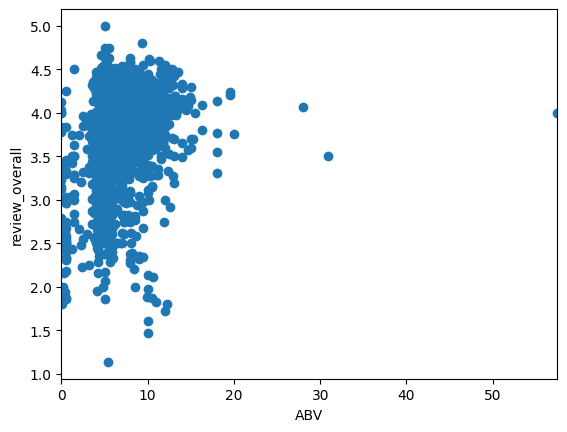

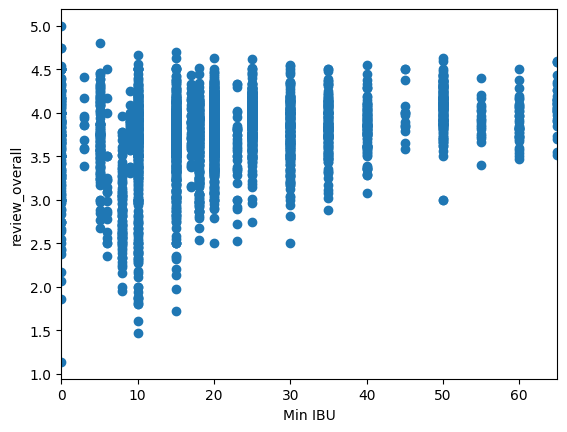

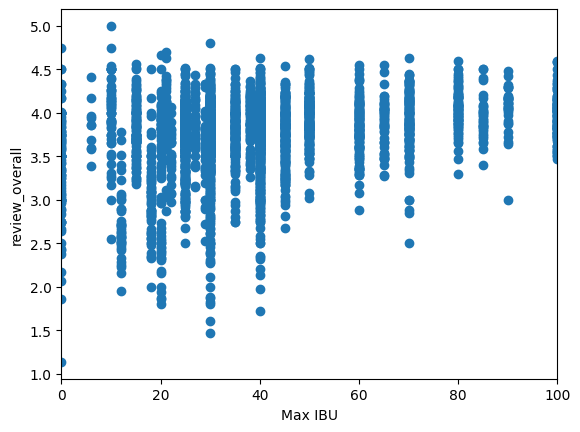

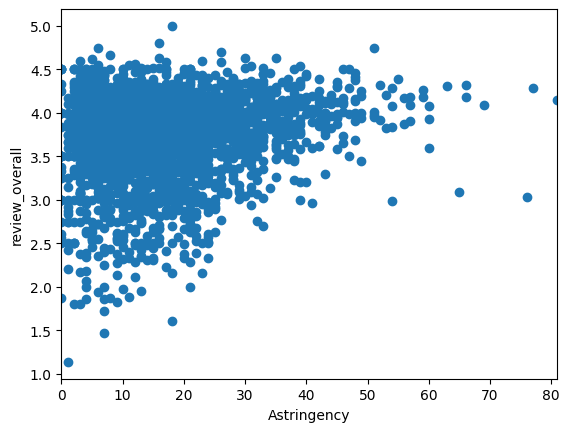

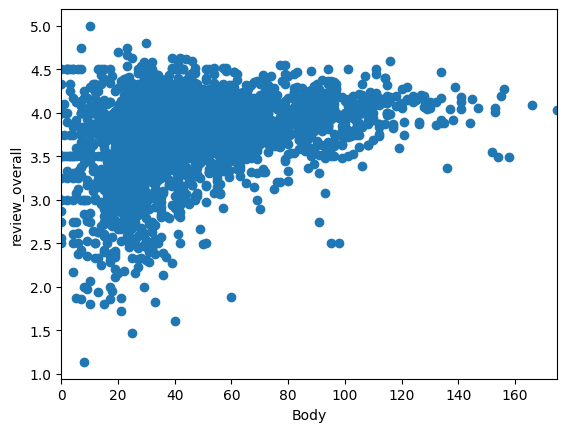

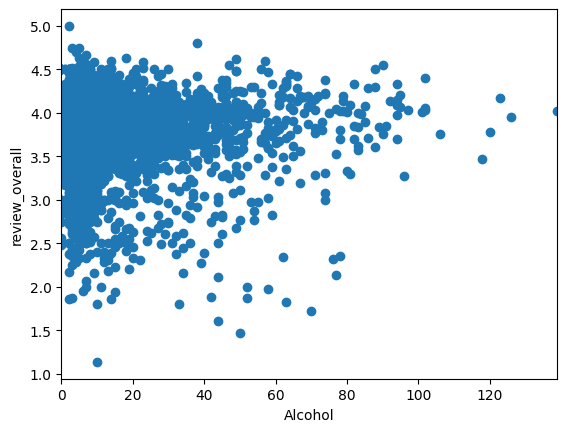

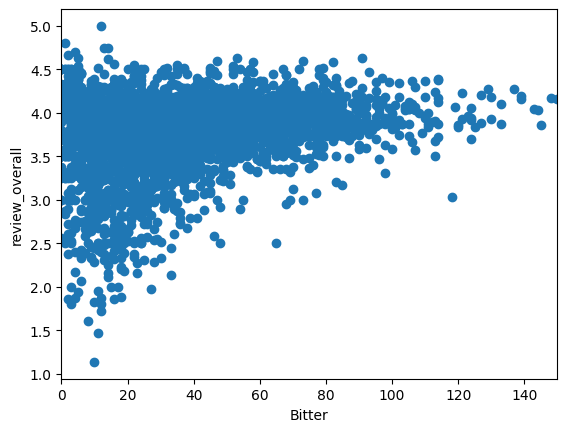

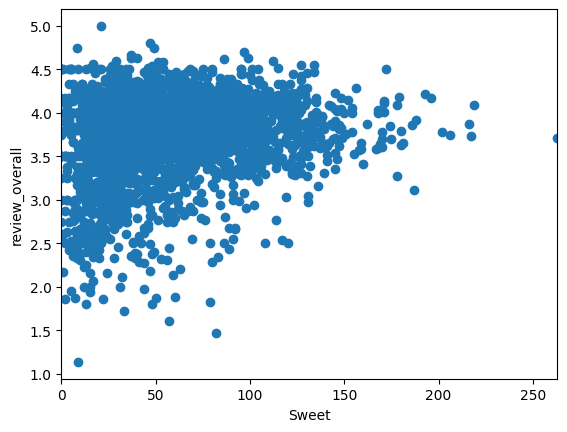

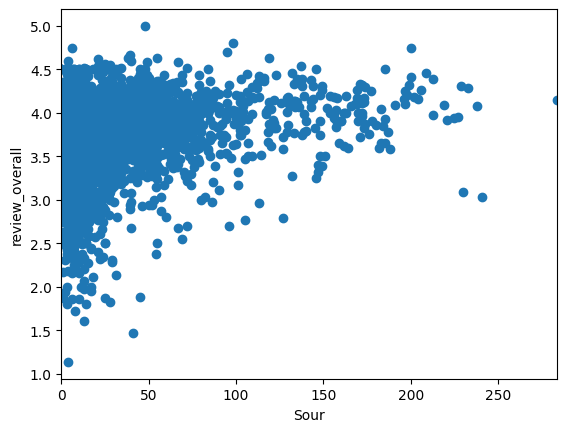

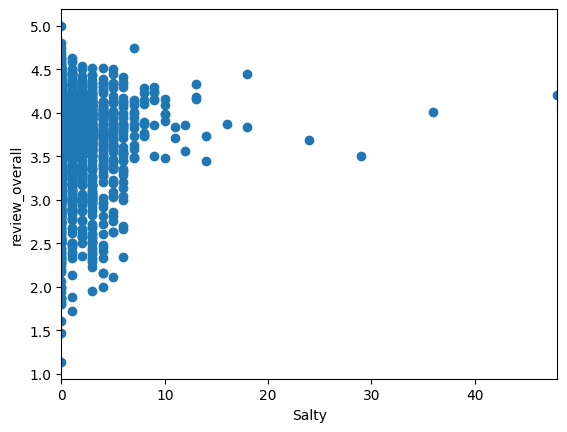

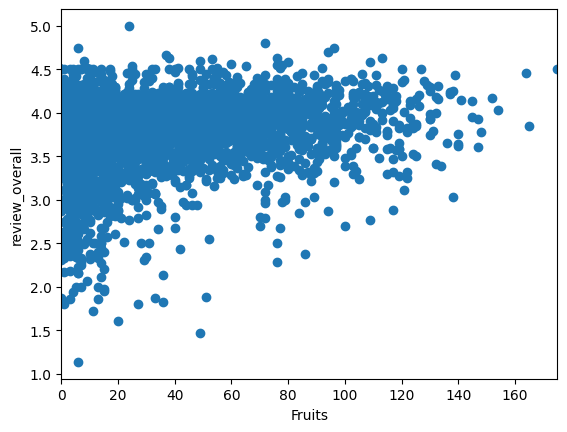

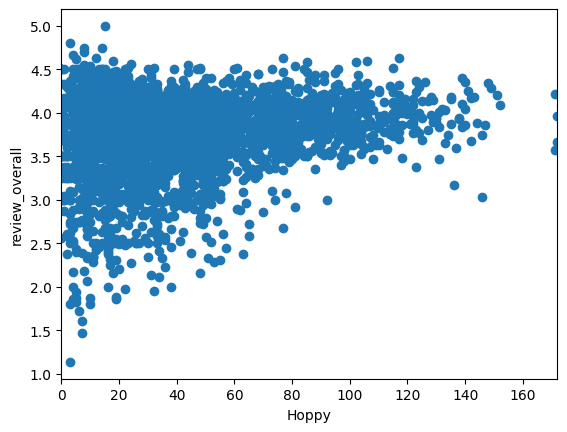

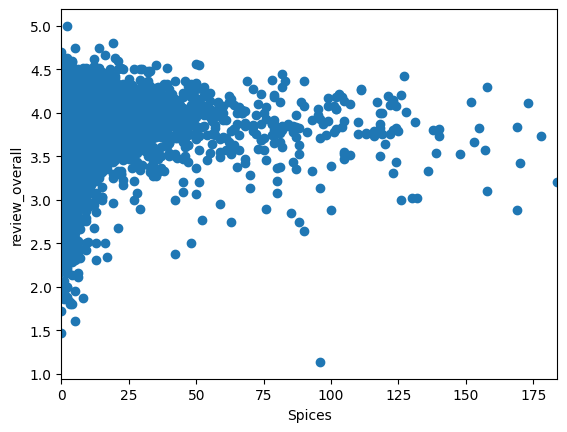

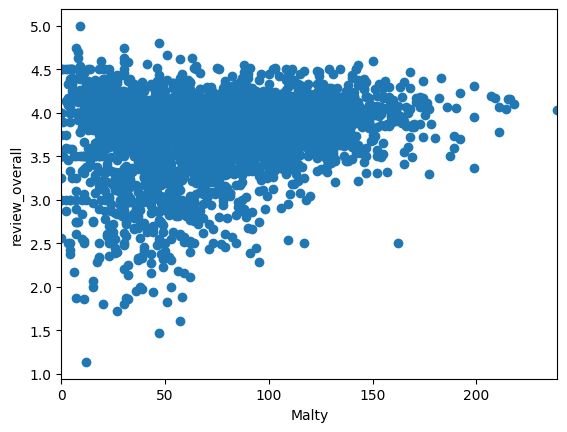

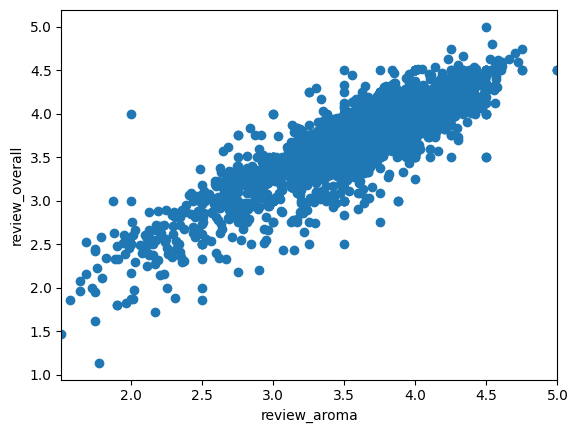

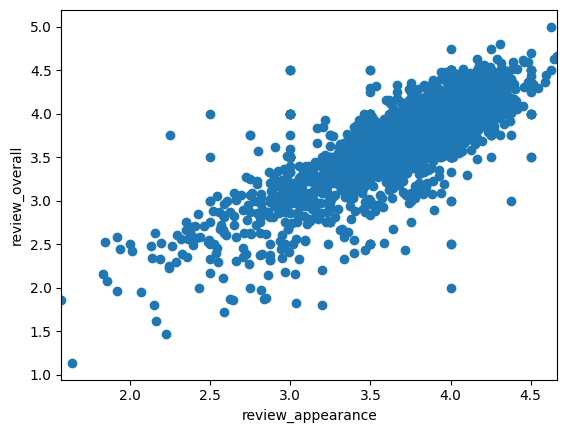

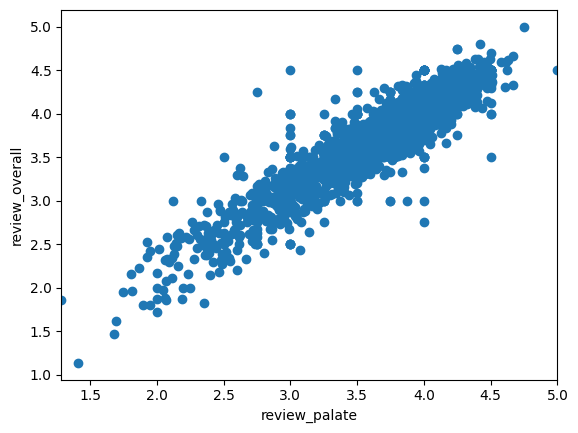

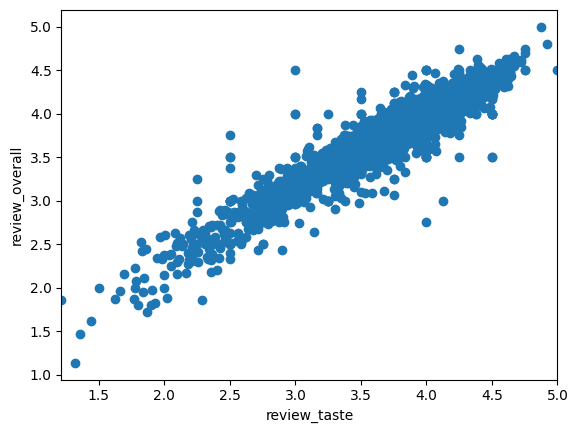

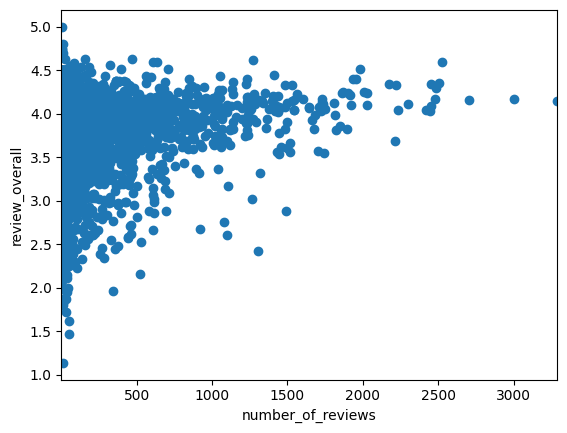

In [1915]:
def display_plot(x, y):
    plt.scatter(x, y)
    plt.xlabel(x.name)
    plt.ylabel(y.name)
    plt.xlim(x.min(), x.max())
    plt.show()

for col in dfcorr.columns:
    if (col != "Style" and col != "Brewery" and col != "review_overall"):
        display_plot(dfcorr[col], Y)

### Standardization

In [1916]:
df_quant = dfcorr.select_dtypes(include=['float64', 'int64'])
df_qual = dfcorr.select_dtypes(include=['object'])

df_standarized = (df_quant - df_quant.mean()) / df_quant.std()


dfcorr_standarized = pd.concat([df_standarized, df_qual], axis=1)
print(dfcorr_standarized.shape)
print(dfcorr_standarized.columns)
#dfcorr_standarized = dfcorr

(3197, 22)
Index(['ABV', 'Min IBU', 'Max IBU', 'Astringency', 'Body', 'Alcohol', 'Bitter',
       'Sweet', 'Sour', 'Salty', 'Fruits', 'Hoppy', 'Spices', 'Malty',
       'review_aroma', 'review_appearance', 'review_palate', 'review_taste',
       'review_overall', 'number_of_reviews', 'Style', 'Brewery'],
      dtype='object')


### Dummies

In [1917]:
print(dfcorr_standarized.shape)

# Takes the 10 most frequent breweries
most_frequents = dfcorr_standarized['Brewery'].value_counts().index[:10]

dummies = pd.DataFrame(np.zeros((len(dfcorr_standarized), len(most_frequents))), columns=most_frequents)
print(dummies.shape)
# Set the dummy variables to 1 if the brewery is in the most frequent breweries
for i, brewery in enumerate(dfcorr_standarized['Brewery'].values):
    if brewery in most_frequents:
        dummies.loc[i, brewery] = 1

dfcorr_standarized = pd.concat([dfcorr_standarized, dummies], axis=1)
dfcorr_standarized = dfcorr_standarized.drop('Brewery', axis=1)
print(dfcorr_standarized.shape)

# 11 - 1 = 10
dfcorr_standarized = pd.get_dummies(dfcorr_standarized, columns=['Style'], drop_first=True,prefix='Style', prefix_sep='_')



(3197, 22)
(3197, 10)
(3197, 31)


In [1918]:
# 22 + (10 - 1) + (11 - 1) - 1
print(dfcorr_standarized.shape)
print(dfcorr_standarized.columns)

(3197, 40)
Index(['ABV', 'Min IBU', 'Max IBU', 'Astringency', 'Body', 'Alcohol', 'Bitter',
       'Sweet', 'Sour', 'Salty', 'Fruits', 'Hoppy', 'Spices', 'Malty',
       'review_aroma', 'review_appearance', 'review_palate', 'review_taste',
       'review_overall', 'number_of_reviews',
       'Boston Beer Company (Samuel Adams)', 'Dogfish Head Brewery',
       'Anheuser-Busch', 'Three Floyds Brewing Co. & Brewpub',
       'Victory Brewing Company', 'Rogue Ales', 'Matt Brewing Company',
       'Short's Brewing Company', 'Great Divide Brewing Company',
       'Russian River Brewing Company', 'Style_Bock', 'Style_Brett',
       'Style_Brown Ale', 'Style_Brut', 'Style_IPA', 'Style_Lambic',
       'Style_Sour', 'Style_Trappist beer', 'Style_dark', 'Style_lager'],
      dtype='object')


## Split the dataset

In [1919]:
dfcorr_standarized = dfcorr_standarized.drop("review_overall", axis=1)
#Y_standardized = (Y - Y.mean()) / Y.std()
X_train, X_test, y_train, y_test = train_test_split(dfcorr_standarized, Y, test_size=0.2, random_state=42)

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

## OLS model

In [1920]:
def get_col_lasso(X_train, y_train):
    # Create the Lasso model
    lasso_model = LassoCV(cv=5)

    # Fit the model to the data
    lasso_model.fit(X_train, y_train)
    print("alpha = "+str(lasso_model.alpha_))

    column_del = lasso_model.coef_ == 0
    column_del[0] = False

    return X_train.columns[column_del]

col_to_del = get_col_lasso(X_train, y_train)

print(col_to_del)


alpha = 0.00040162011997082613
Index(['Salty', 'Boston Beer Company (Samuel Adams)',
       'Three Floyds Brewing Co. & Brewpub', 'Victory Brewing Company',
       'Rogue Ales', 'Matt Brewing Company', 'Great Divide Brewing Company',
       'Russian River Brewing Company', 'Style_Brett', 'Style_Brut',
       'Style_Lambic', 'Style_Sour', 'Style_Trappist beer'],
      dtype='object')


In [1921]:
X_train_corr = X_train.drop(col_to_del, axis=1)
X_test_corr = X_test.drop(col_to_del, axis=1)

In [1922]:
model = sm.OLS(y_train,X_train_corr).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         review_overall   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     1040.
Date:                Sat, 07 Jan 2023   Prob (F-statistic):               0.00
Time:                        01:04:59   Log-Likelihood:                 1626.6
No. Observations:                2557   AIC:                            -3199.
Df Residuals:                    2530   BIC:                            -3041.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

### Testing hypotheses

#### Outliers

In [1923]:
def get_X_outliers(X_train):

    X=X_train.values
    # Calculate X'X
    X_transpose_X = np.dot(X.T, X)

    # Calculate the inverse of X'X
    X_transpose_X_inv = np.linalg.inv(X_transpose_X)

    # Calculate the projection matrix H
    H = np.dot(X, X_transpose_X_inv)
    H = np.dot(H , X.T)

    # Calculate the leverage for each point
    H_ii = np.diagonal(H)

    threshold = 2 * X_train.shape[1] / X_train.shape[0]

    X_outliers=[]
    for i in range (len(H_ii)):
        if H_ii[i] > threshold:
            X_outliers.append(i)
            
    return X_outliers, H_ii

X_outliers, H_ii = get_X_outliers(X_train_corr)
print(len(X_outliers))

182


In [1924]:
def get_Y_outliers(X_train, model, H_ii):

    residu = np.array(model.resid)
    SSE =  np.dot(residu.T,residu)

    Di_star = []

    for i in range (X_train.shape[0]):
        num = (X_train.shape[0] - X_train.shape[1] - 1)

        denom = (SSE * (1 - H_ii[i]) - residu[i]*residu[i] )
        Di = np.sqrt(num/ denom)*residu[i]
        Di_star.append(np.abs(Di))

    threshold = t.ppf(1-0.05/2, X_train.shape[0] - X_train.shape[1]-1)

    Y_outliers=[]

    for i in range (len(Di_star)):
        if (Di_star[i] > threshold):
            Y_outliers.append(i) 

    return Y_outliers

Y_outliers = get_Y_outliers(X_train_corr, model, H_ii)
print(len(Y_outliers))

124


#### Influential observations

In [1925]:
def get_influencial_obs_DFFITS(model):
    dffits = model.get_influence().dffits[0]
    threshold = 2 * np.sqrt(1/X_train_corr.shape[0] + 1/X_train_corr.shape[1])
    return np.where(dffits > threshold)[0]

def get_influencial_obs_DFBETAS(model):
    dfbetas = model.get_influence().dfbetas
    dfbetas_treshold = 2 * np.sqrt(X_train_corr.shape[1] / X_train_corr.shape[0])
    influential_obs_dfbetas = []
    for i in range(len(dfbetas)):
        for j in range(len(dfbetas[i])):
            if (dfbetas[i][j] > dfbetas_treshold):
                influential_obs_dfbetas.append(i)
                break

    return influential_obs_dfbetas


def get_influencial_obs_cooks(model):
    cooks_distance = model.get_influence().cooks_distance[0]

    n = X_train_corr.shape[0]
    p = X_train_corr.shape[1]
    alpha = 0.05
    #Get the influential observations on Cook's distance
    cooks_distance_treshold = f.ppf(1 - alpha, p, n - p)
    print(cooks_distance_treshold)

    influential_obs_cooks = np.where(cooks_distance > cooks_distance_treshold)
    return influential_obs_cooks[0]

influencial_obs_DFFITS = get_influencial_obs_DFFITS(model)
influencial_obs_DFBETAS = get_influencial_obs_DFBETAS(model)
influencial_obs_cooks = get_influencial_obs_cooks(model)

print(len(influencial_obs_DFFITS))
print(len(influencial_obs_DFBETAS))
print(len(influencial_obs_cooks))

1.4901130468892645
19
41
0


#### Multicollinearity

In [1926]:
def get_column_col(X_train):
    # Convert the DataFrame to a matrix
    X = X_train.drop(["const"], axis=1)
    X = X.values

    # Compute the VIF for each column
    vif = [variance_inflation_factor(X, i) for i in range(X.shape[1])]

    # Print the VIF for each column
    print(vif)

    features_col = []
    for i in range(len(vif)):
        if vif[i] > 10:
            features_col.append(i)

    colum_name = X_train.drop(["const"], axis=1).columns[features_col]
    print(colum_name)

get_column_col(X_train_corr)

[2.39701089509286, 4.468994392256706, 4.516333201137564, 2.1233973641122694, 3.6564792300551696, 2.2626054938732834, 5.672081476233835, 3.297906711282441, 4.485791769129975, 4.691777329933282, 3.7714642082799266, 1.3346189336151562, 4.1379129102864916, 11.091772270023064, 4.974598682901704, 12.692949561880011, 15.368327028636042, 1.1582378480771265, 1.068470767293476, 1.1586816813297582, 1.0293959402749358, 1.081919978695382, 1.039695185329145, 1.012718412636592, 1.1433714850116952, 1.0238162829912125]
Index(['review_aroma', 'review_palate', 'review_taste'], dtype='object')


#### heteroskedasticty

In [1927]:
def verify_hetero_white(model):
    # Perform the Goldfeld-Quandt test
    _, pval, _, _= sm.stats.diagnostic.het_white(model.resid, model.model.exog)

    # Check the p-value
    if pval < 0.05:
        print("The assumption of homoscedasticity is violated.")
    else:
        print("The assumption of homoscedasticity is not violated.")

verify_hetero_white(model)

The assumption of homoscedasticity is violated.


In [1928]:
def verify_hetero_gold(model):
    # Perform the Goldfeld-Quandt test
    _, pval, _= sm.stats.diagnostic.het_goldfeldquandt(model.resid, model.model.exog)

    # Check the p-value
    if pval < 0.05:
        print("The assumption of homoscedasticity is violated.")
    else:
        print("The assumption of homoscedasticity is not violated.")

verify_hetero_gold(model)

The assumption of homoscedasticity is not violated.


In [1929]:
def verify_hetero_breusch_pagan(model):
    _, pval, _, f_pval = sm.stats.diagnostic.het_breuschpagan(model.resid, model.model.exog)
    # Check the p-value
    if pval < 0.05:
        print("The assumption of homoscedasticity is violated.")
    else:
        print("The assumption of homoscedasticity is not violated.")

verify_hetero_breusch_pagan(model)

The assumption of homoscedasticity is violated.


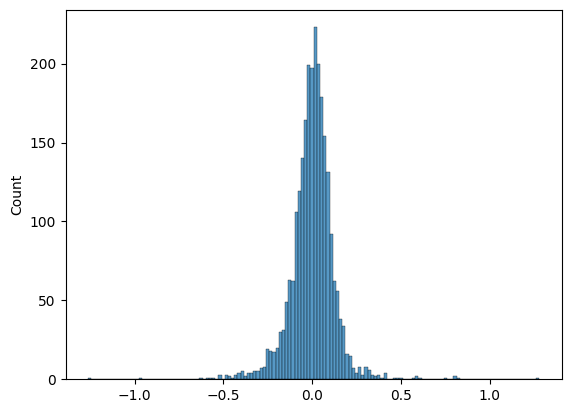

In [1930]:
# Plot the residuals
def plot_resid(model):
    sns.histplot(model.resid)

plot_resid(model)

## Improvments

### Remove influential observations

In [1931]:
obs = np.union1d(influencial_obs_DFFITS, influencial_obs_DFBETAS)
X_train_wo = X_train_corr.drop(X_train_corr.index[obs])
y_train_wo = y_train.drop(y_train.index[obs])

print(X_train_wo.shape)

(2516, 27)


### Robust OLS

In [1932]:
model = sm.OLS(y_train_wo, X_train_wo).fit(cov_type='HC1')
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         review_overall   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     1005.
Date:                Sat, 07 Jan 2023   Prob (F-statistic):               0.00
Time:                        01:06:02   Log-Likelihood:                 2041.3
No. Observations:                2516   AIC:                            -4029.
Df Residuals:                    2489   BIC:                            -3871.
Df Model:                          26                                         
Covariance Type:                  HC1                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

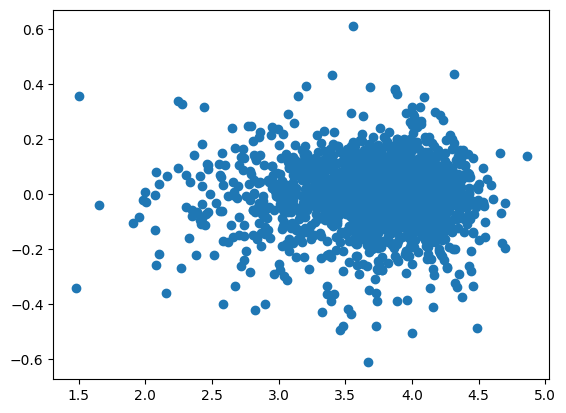

In [1933]:
# Display the Residual plot
plt.scatter(model.fittedvalues, model.resid)

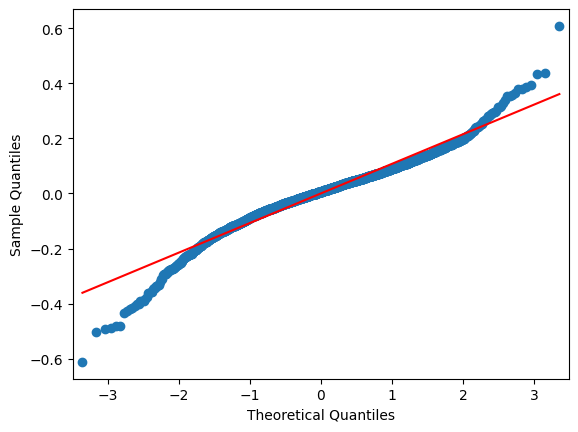

In [1934]:
# Display the Q-Q plot
fig = sm.qqplot(model.resid, line='s')

<AxesSubplot:ylabel='Count'>

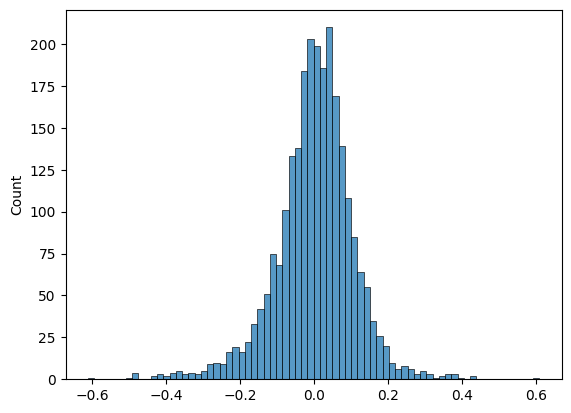

In [1935]:
# Display hist residuals
sns.histplot(model.resid)

## Test of significance

In [1936]:
#Significance of the coefficients
print(model.tvalues)

const                      513.981612
ABV                         -5.169321
Min IBU                      3.045934
Max IBU                     -3.420755
Astringency                  9.112179
Body                         1.181146
Alcohol                     -7.378879
Bitter                      -4.658419
Sweet                       -9.908444
Sour                        -8.598024
Fruits                       6.235023
Hoppy                        2.952171
Spices                      -7.329365
Malty                        5.009642
review_aroma                -0.571075
review_appearance            0.797926
review_palate               11.342087
review_taste                23.671524
number_of_reviews           -0.096954
Dogfish Head Brewery        -4.779491
Anheuser-Busch               2.564480
Short's Brewing Company     -4.185196
Style_Bock                  -1.249292
Style_Brown Ale              0.894083
Style_IPA                    0.097410
Style_dark                  -1.636868
Style_lager 

## Prediction


In [1937]:
ynewpred = model.predict(X_test_corr)


In [1938]:
def display_prediction(y_test, ynewpred):
    fig = go.Figure()
    fig.add_trace(go.Scatter(
        x=[2, 3, 5 ],  # x values
        y=[2, 3, 5 ],  # y values
        mode='lines'  # set the trace type to markers
    ))
    fig.add_trace(go.Scatter(
        x=ynewpred , y=y_test,  # y values
        mode='markers'  # set the trace type to markers
    ))


    fig.update_layout(
        xaxis=dict(
            title='prediction'
        ),
        yaxis=dict(
            title='y_test'
        )
    )
    fig.show()


In [1939]:
display_prediction(y_test, ynewpred)

In [1940]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def compute_RMSE(y_test, ynewpred):
    # Calculate the RMSE of the predictions
    rmse = np.sqrt(mean_squared_error(y_test, ynewpred))
    print(rmse)

compute_RMSE(y_test, ynewpred)

0.12681435104438002


In [1941]:
"""fig, ax = plt.subplots()
#ax.plot(X_train["ABV"], y_train, "o", label="Data")
ax.plot(X_test["Alcohol"], ynewpred, "o", label="prediction")

ax.plot(X_test["Alcohol"], y_test, "o", label="True")
#ax.plot(np.hstack((X_train, X_test)), np.hstack((res.predict(X_train), ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")"""

'fig, ax = plt.subplots()\n#ax.plot(X_train["ABV"], y_train, "o", label="Data")\nax.plot(X_test["Alcohol"], ynewpred, "o", label="prediction")\n\nax.plot(X_test["Alcohol"], y_test, "o", label="True")\n#ax.plot(np.hstack((X_train, X_test)), np.hstack((res.predict(X_train), ynewpred)), "r", label="OLS prediction")\nax.legend(loc="best")'